# Secondary Segmentation

This notebook will explore the next set of segmenation options

## Author: Alexander Goudemond, Student Number: 219030365

# Imports


In [1]:
from os import getcwd, walk, mkdir
from os.path import join

import cv2
from PIL.Image import fromarray

import numpy as np

import matplotlib.pyplot as plt

# Previous Summary

2 kinds of processed images are present - referred to here as location 1 and location 2.

Location 1 refers to images that have been Dilated, then Opened.

Location 2 refers to images that have been Opened, then Eroded.

Between the 2, location 1 appears to segment better!

Unfortunately, the Watershed segmentation is not working, most likely because of the thresholding of the images. This may be compounded by our pre-processing step - however, because the pre-processing was a simple morphological operation, the results are almost the same

The best images is shown below:

What makes the images successful is the OpenCV use of a threshold mask values 17 and 19. Other values were explored, however these are the best result! It also assists with removal of noise to a high degree, though the 3rd data-set is broken into many smaller pieces

Below are 3 pictures:

- OpenCV Thresholding using the value of 17
- The negative of the above image
- OpenCV Thresholding using the value of 19

![Watershed of 17](007_Initial_Segmentation\\023_Watershed_AdaptedThresholdingTwo_A17_1_pics.jpg "Watershed of 17")

![Negative of OpenCV Threshold value 17](007_Initial_Segmentation\\019_Watershed_AdaptedThresholding7_1_pics.jpg "Negative of OpenCV Threshold value 17")

![Watershed of 19](007_Initial_Segmentation\\023_Watershed_AdaptedThresholdingTwo_A19_1_pics.jpg "Watershed of 19")

Notice how the threshold of 19 contains more texture than 17, but 17 is a more binary representation!

# Loading Test Images

This section of the notebook focusses on loading the first 10 images of each processed folder to explore segmentation

In [2]:


def getFirstTenPics(desired_directory, directory_array):
    # Now, generate the array of images
    test_images = []
    current_directory = getcwd()

    path = walk(current_directory+ "\\" + desired_directory)

    i = -1
    temp = -1
    for root, dirs, files in path:
        # print(dirs)
        for item in files:
            # only execute for first picture in directory
            if ("t0000.tif" in item) or ("t000.tif" in item):
                i += 1

                # skips folder "02" in data-sets
                if (i % 2 == 1):
                    break
                    
                # print(i)
                temp = i // 2

                # skip Challenge data-sets
                if ("(1)" in directory_array[temp]):
                    break

                location = ( current_directory + "\\" + desired_directory + "\\" + directory_array[temp] + 
                            "\\" + directory_array[temp] + "\\01\\" + item)
                # print(location)

                img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)

                test_images.append(img) # place into array

                break

            else:
                break
            
    return resizeImageArray(test_images)
###

def resizeImageArray(image_array):
    new_array = []
    x = -1; y = -1

    for i in range(len(image_array)):
        img = image_array[i]

        if (i == 0):
            (x, y) = img.shape
            x = x // 2
            y = y // 2
        
        img_reshaped = cv2.resize(img, (x, y))
        new_array.append(img_reshaped)
    
    return new_array
###

In [3]:
'''
We only need to show every _OTHER_ folder, as each data-set has a 
 training and challenge set. So out of 20 files, we need to show 10

First things first, let us create an array of the directory locations
'''

data_sets = "..\\..\\Comp700_DataSets"
current_directory = getcwd()

path = walk(current_directory + "\\" + data_sets)

directory_array = [] # contains the main folders

i = 1
for root, dirs, files in path:
    if (i == 2):
        directory_array = dirs
        break
    
    i += 1

print("Directory Array")
print(directory_array)


Directory Array
['BF-C2DL-HSC', 'BF-C2DL-HSC (1)', 'BF-C2DL-MuSC', 'BF-C2DL-MuSC (1)', 'DIC-C2DH-HeLa', 'DIC-C2DH-HeLa (1)', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-Huh7 (1)', 'Fluo-C2DL-MSC', 'Fluo-C2DL-MSC (1)', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-GOWT1 (1)', 'Fluo-N2DH-SIM+', 'Fluo-N2DH-SIM+ (1)', 'Fluo-N2DL-HeLa', 'Fluo-N2DL-HeLa (1)', 'PhC-C2DH-U373', 'PhC-C2DH-U373 (1)', 'PhC-C2DL-PSC', 'PhC-C2DL-PSC (1)']


In [4]:
location1 = "..\\..\\Comp700_Processed_DataSets_1"
location1_pics = getFirstTenPics(location1, directory_array)

print( len(location1_pics) )

10


In [5]:
location2 = "..\\..\\Comp700_Processed_DataSets_2"
location2_pics = getFirstTenPics(location2, directory_array)

print( len(location2_pics) )

10


In [6]:
# from PIL.Image import fromarray

def stitchTogetherPics(array_of_images):
    # top level
    myList = (array_of_images[0], array_of_images[1], array_of_images[2], array_of_images[3], array_of_images[4])
    numpy_horizontal_top = np.hstack(myList)

    # bottom level
    myList = (array_of_images[5], array_of_images[6], array_of_images[7], array_of_images[8], array_of_images[9])
    numpy_horizontal_bottom = np.hstack(myList)

    # stick 2 ontop of one another
    myList = (numpy_horizontal_top, numpy_horizontal_bottom)
    numpy_final_pic_concat = np.concatenate(myList, axis=0)

    return numpy_final_pic_concat
###

# save and show in cell
def saveAndShow(desired_directory, image_array, picName):
    fileName = desired_directory + "\\" + picName

    # Save pic to file, using Pillow!
    new_img = fromarray(stitchTogetherPics(image_array))
    new_img.save(fileName) # save using Pillow

    width = 30
    height = 10
    fig = plt.figure()
    fig.set_figwidth(width); fig.set_figheight(height)

    new_img = plt.imread(fileName)
    plt.title(picName)
    plt.axis('off')
    plt.imshow(new_img, cmap='gray')
###

def tryMakeDirectory(current_directory, destination_directory):
    try:
        # join comes from os.path
        mkdir( join(current_directory, destination_directory) )
    except FileExistsError:
        # print("Folder already exists!")
        pass
    except:
        print("Unknown Error Encountered...")
###

In [7]:
destination_directory = "008_Secondary_Segmentation"
tryMakeDirectory(current_directory, destination_directory)

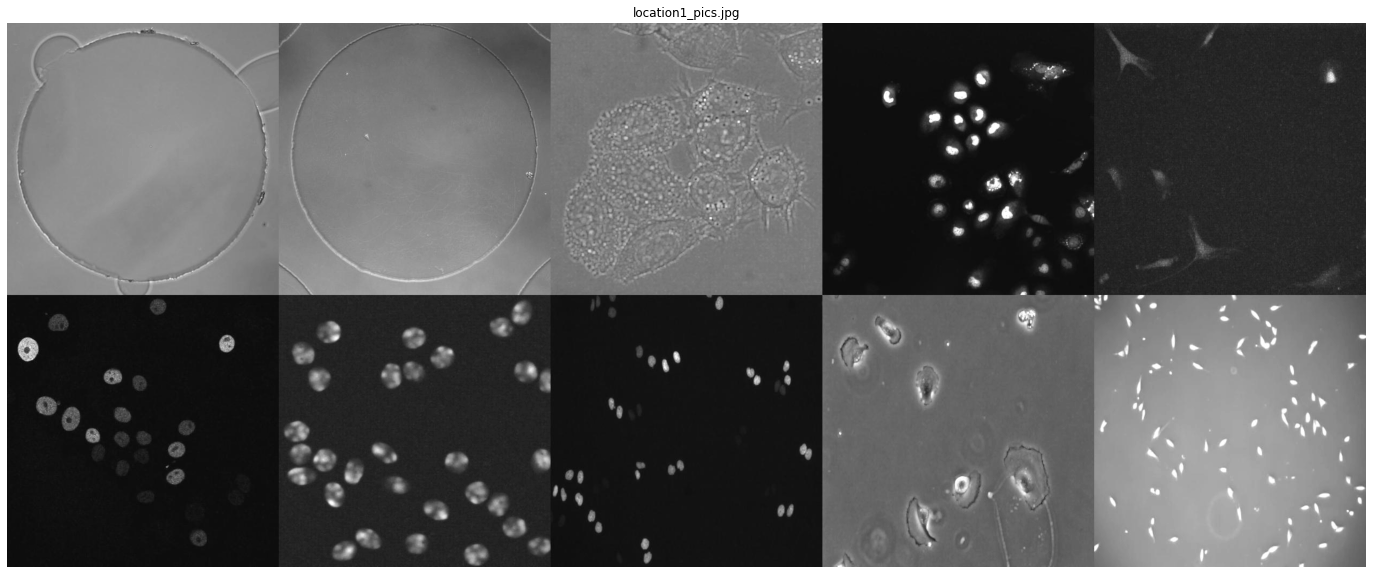

In [8]:
saveAndShow(destination_directory, location1_pics, "location1_pics.jpg")

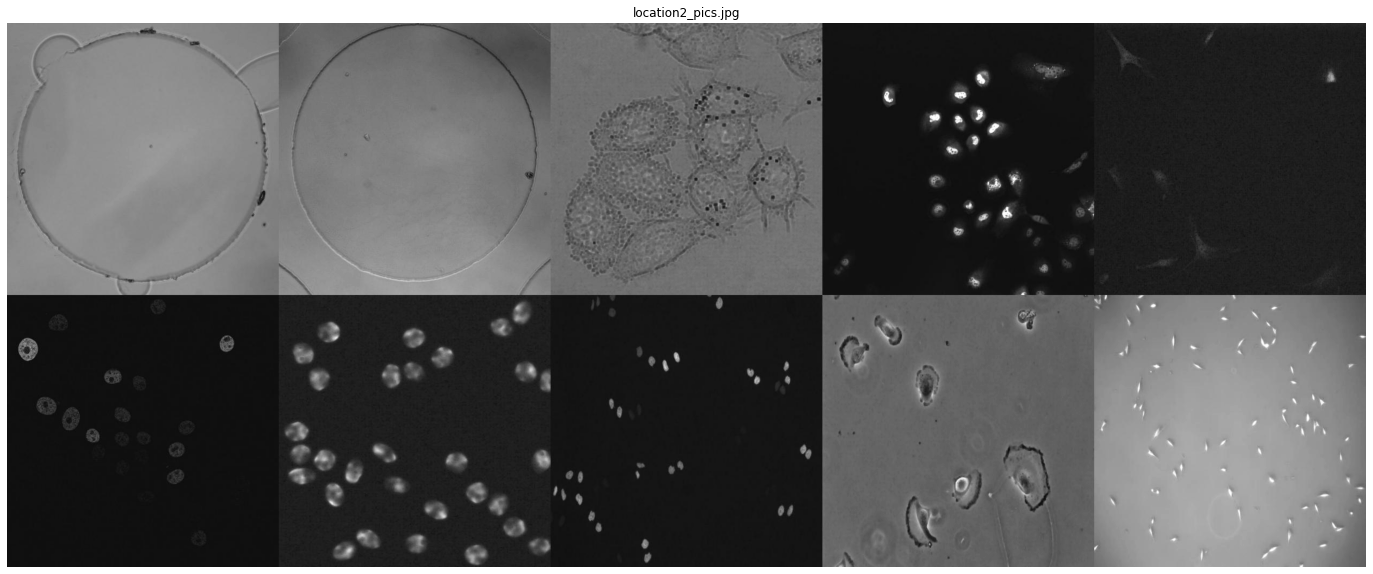

In [9]:
saveAndShow(destination_directory, location2_pics, "location2_pics.jpg")

# Edge Detection

Let us conduct some simple edge detection methods to see if those are successful


## Canny Edge Detection

For the images below, we will manipulate the threshold values to attempt to see the results as we go

In [13]:
def cannyEdgeDetection(image, thresh1, thresh2):
    edge = cv2.Canny(image, thresh1, thresh2)

    return edge
###

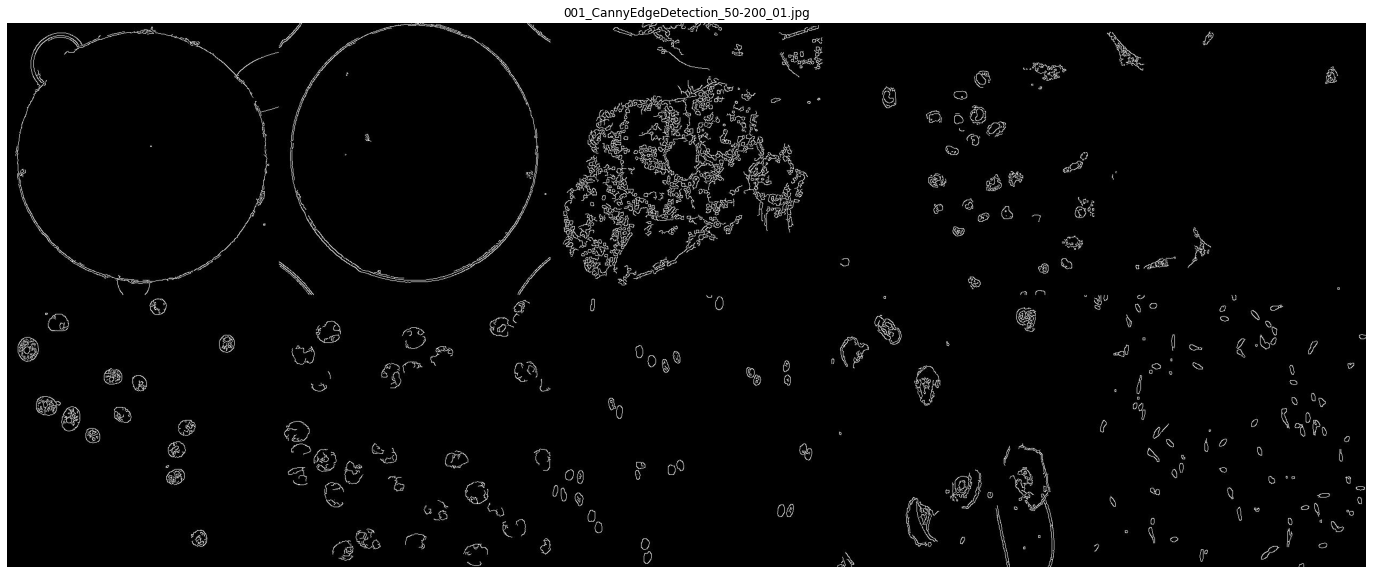

In [18]:
image_collection = []

for i in range(len(location1_pics)):
    image = location1_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 50, 200)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_50-200_01.jpg")

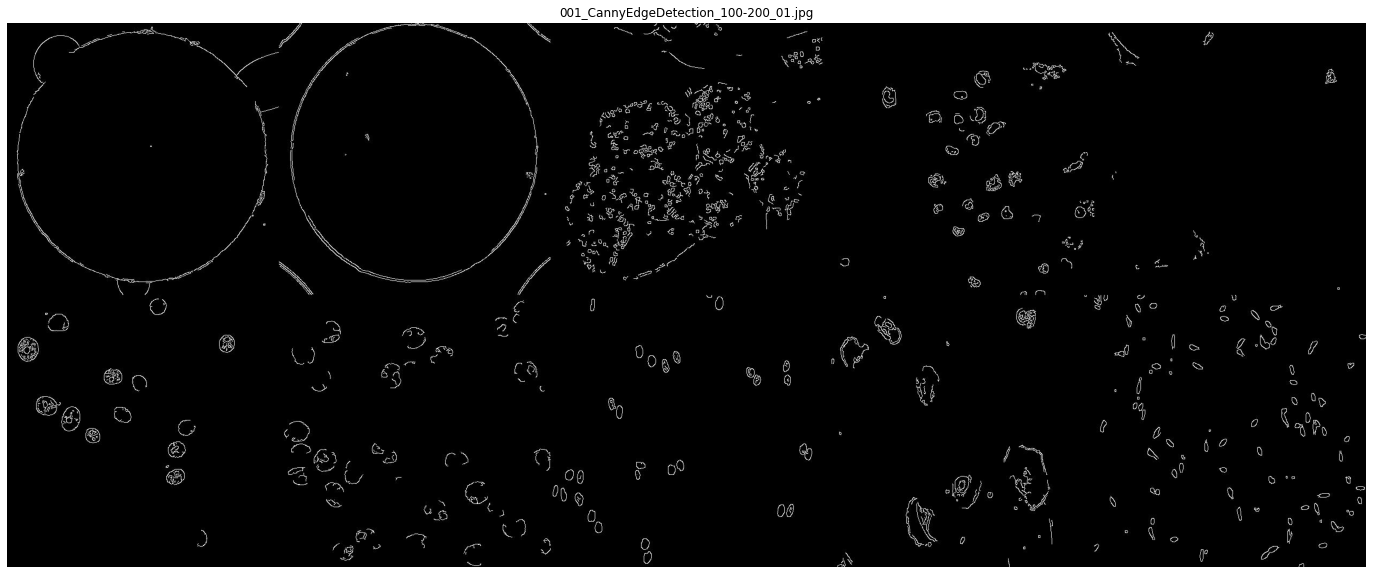

In [19]:
image_collection = []

for i in range(len(location1_pics)):
    image = location1_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 100, 200)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_100-200_01.jpg")

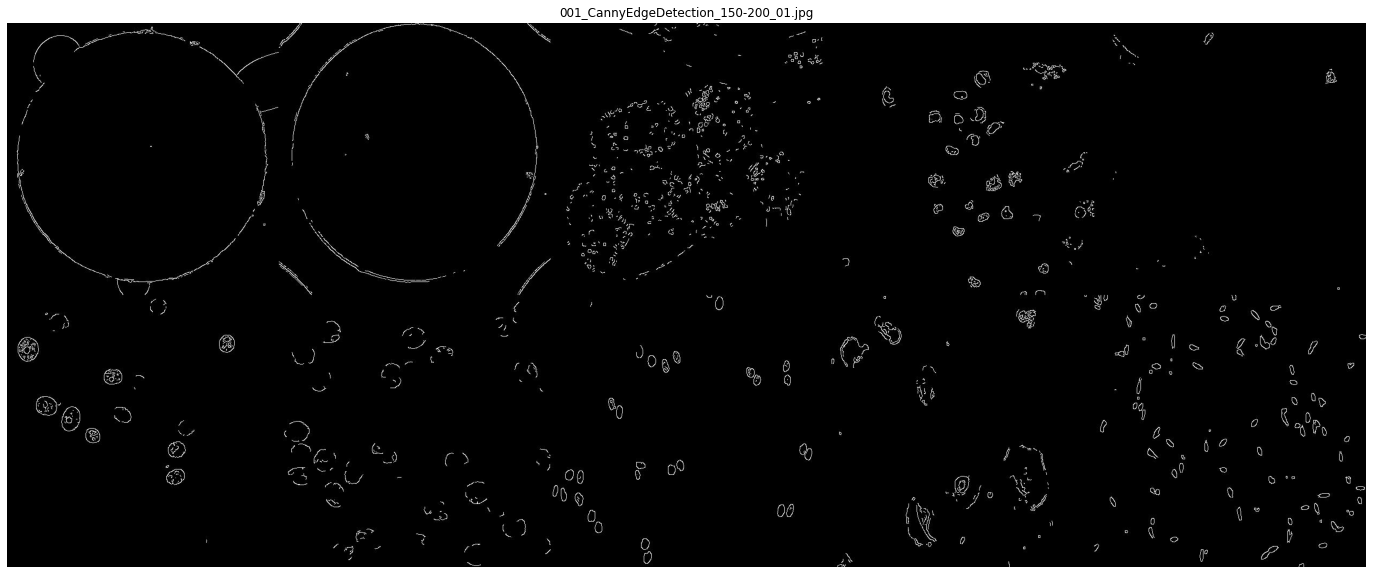

In [20]:
image_collection = []

for i in range(len(location1_pics)):
    image = location1_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 150, 200)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_150-200_01.jpg")

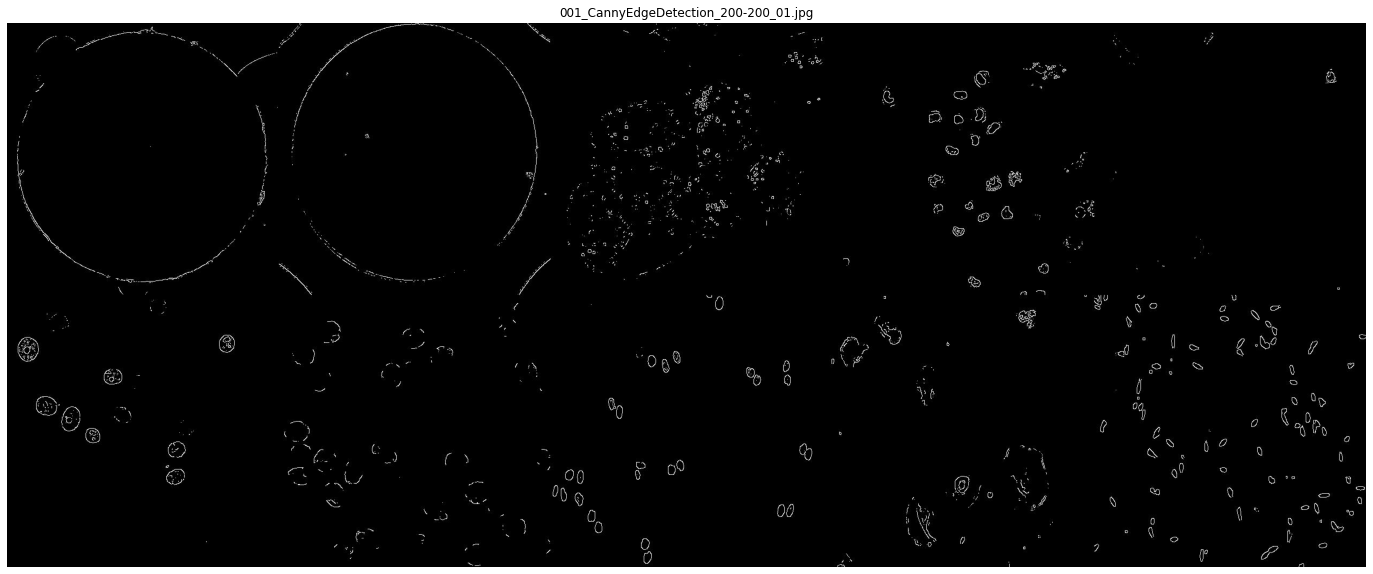

In [21]:
image_collection = []

for i in range(len(location1_pics)):
    image = location1_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 200, 200)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_200-200_01.jpg")

It appears from the threshold values that a low initial threshold value helps, so let us manipulate the second threshold value now:

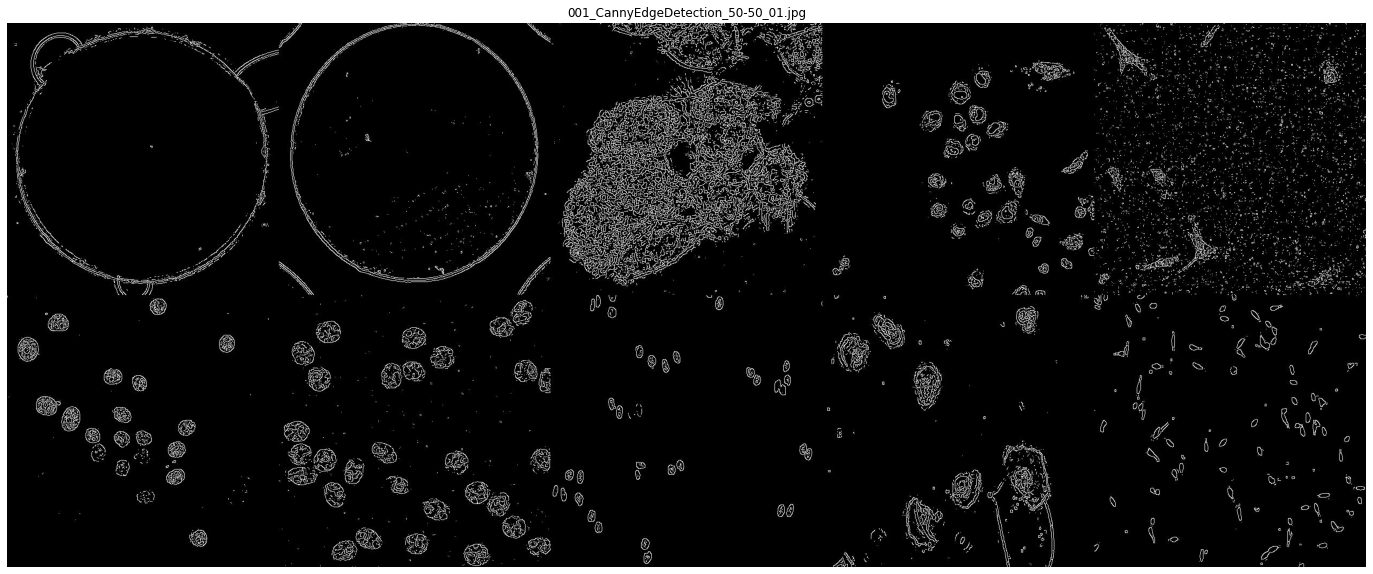

In [22]:
image_collection = []

for i in range(len(location1_pics)):
    image = location1_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 50, 50)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_50-50_01.jpg")

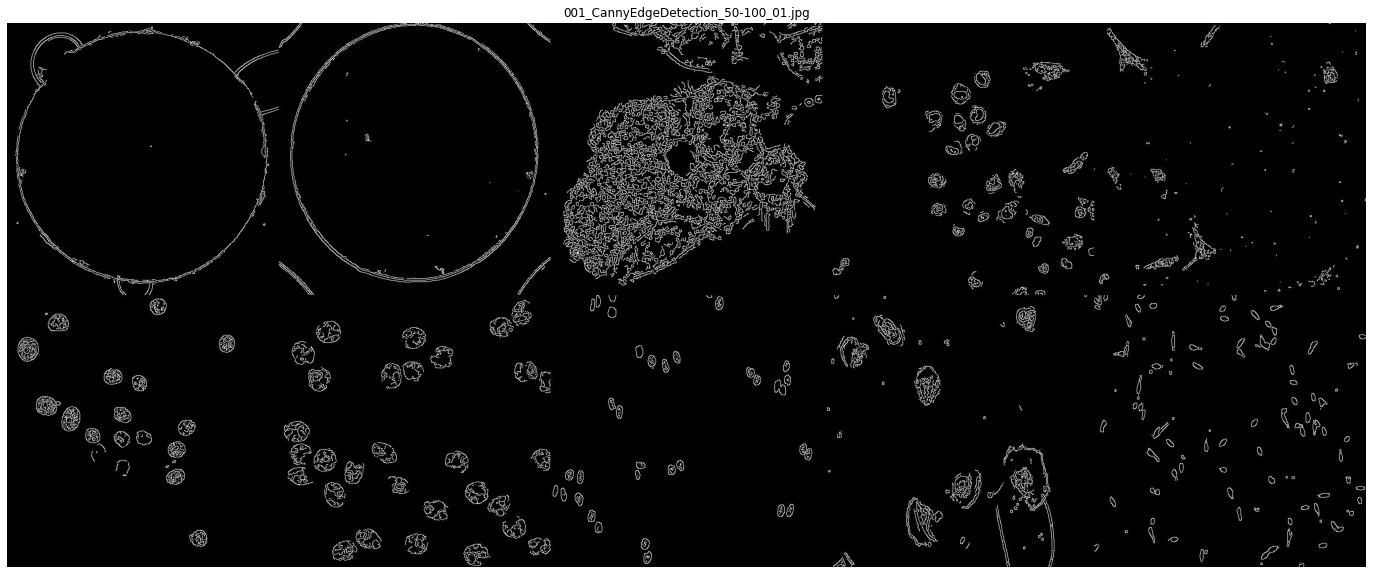

In [23]:
image_collection = []

for i in range(len(location1_pics)):
    image = location1_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 50, 100)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_50-100_01.jpg")

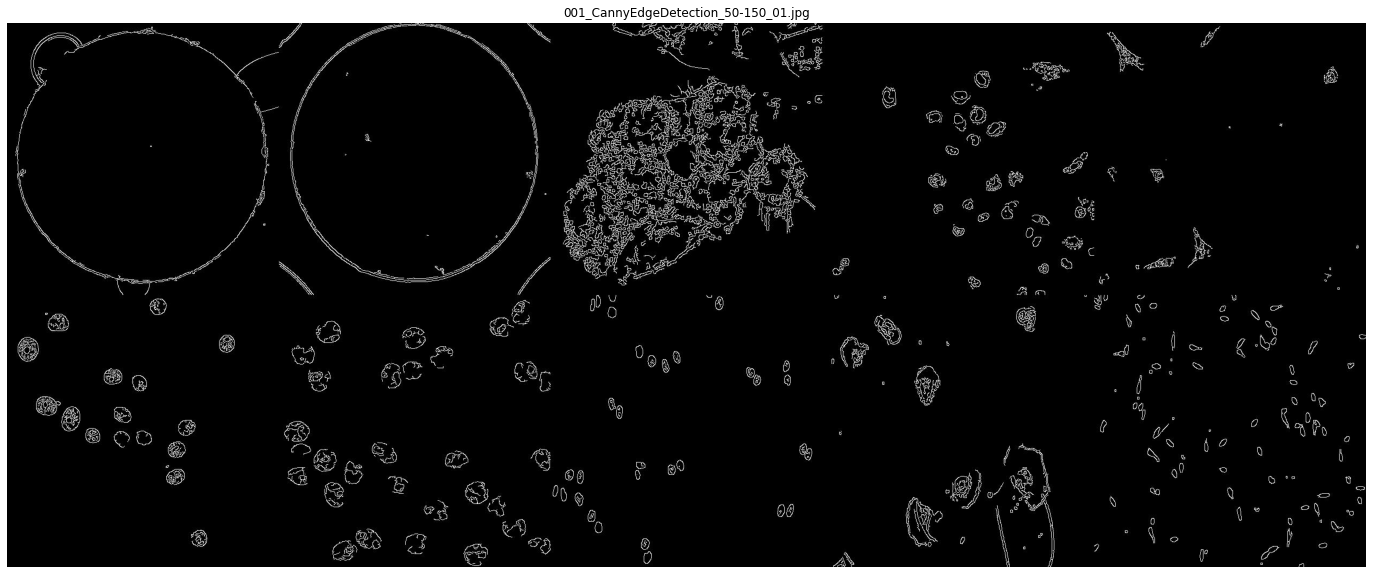

In [24]:
image_collection = []

for i in range(len(location1_pics)):
    image = location1_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 50, 150)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_50-150_01.jpg")

What about Canny Edge on the second data-set?

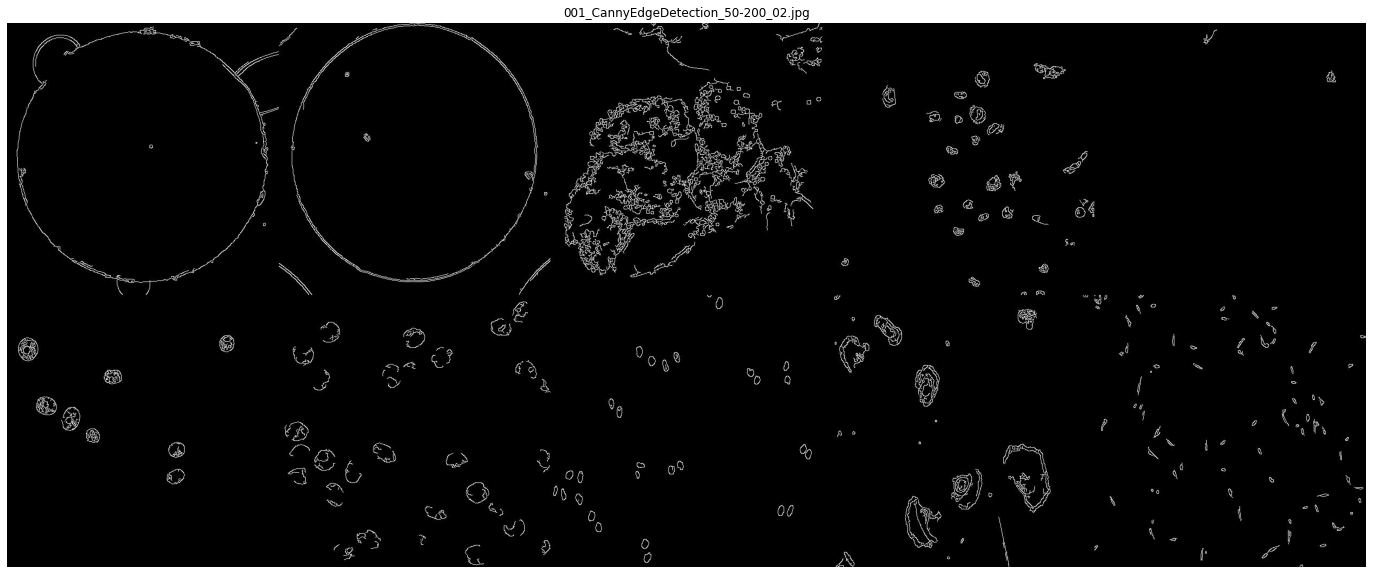

In [25]:
image_collection = []

for i in range(len(location2_pics)):
    image = location2_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 50, 200)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_50-200_02.jpg")

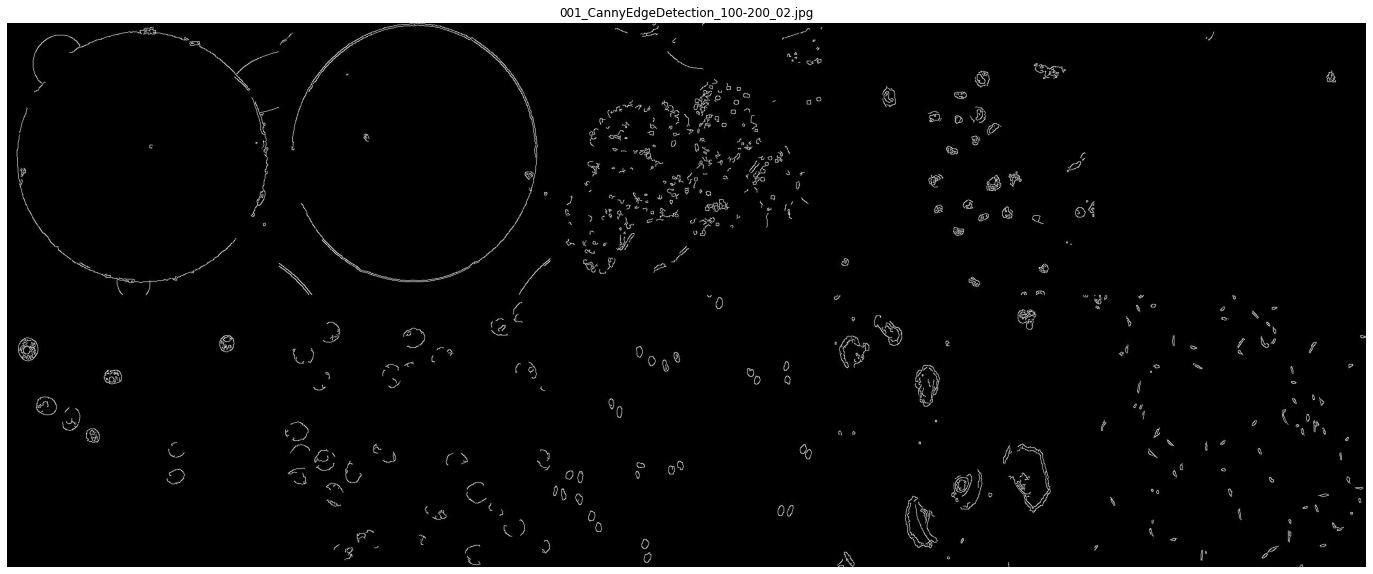

In [26]:
image_collection = []

for i in range(len(location2_pics)):
    image = location2_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 100, 200)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_100-200_02.jpg")

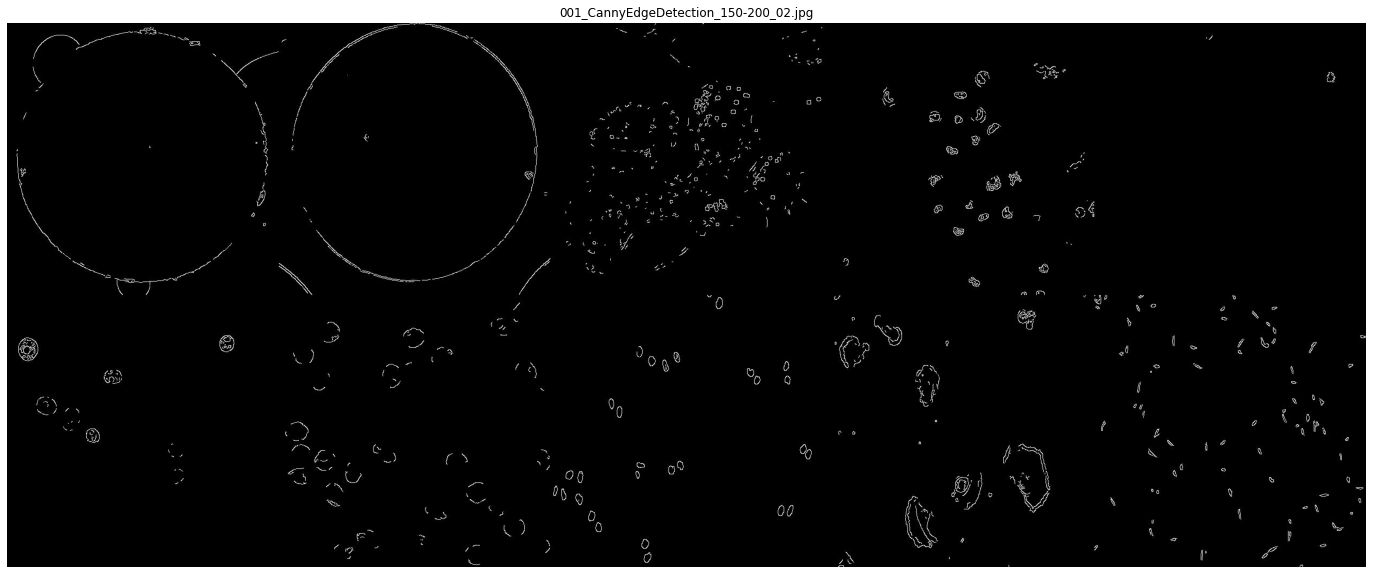

In [27]:
image_collection = []

for i in range(len(location2_pics)):
    image = location2_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 150, 200)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_150-200_02.jpg")

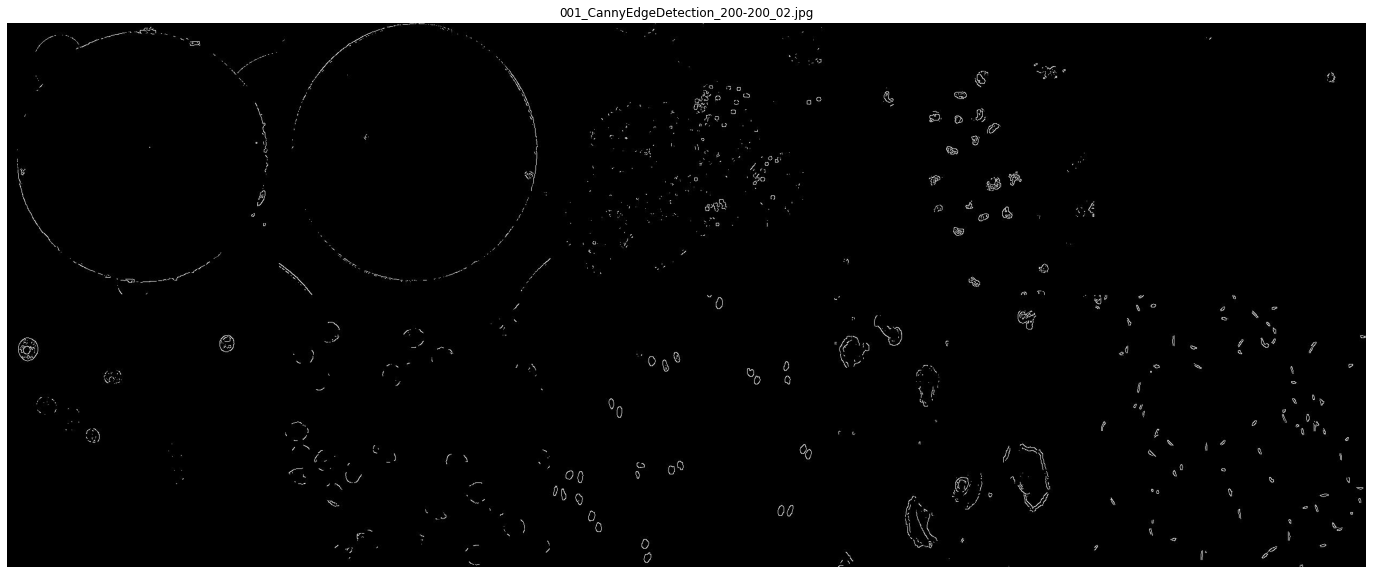

In [28]:
image_collection = []

for i in range(len(location2_pics)):
    image = location2_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 200, 200)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_200-200_02.jpg")

It appears from the threshold values that a low initial threshold value helps, so let us manipulate the second threshold value now:

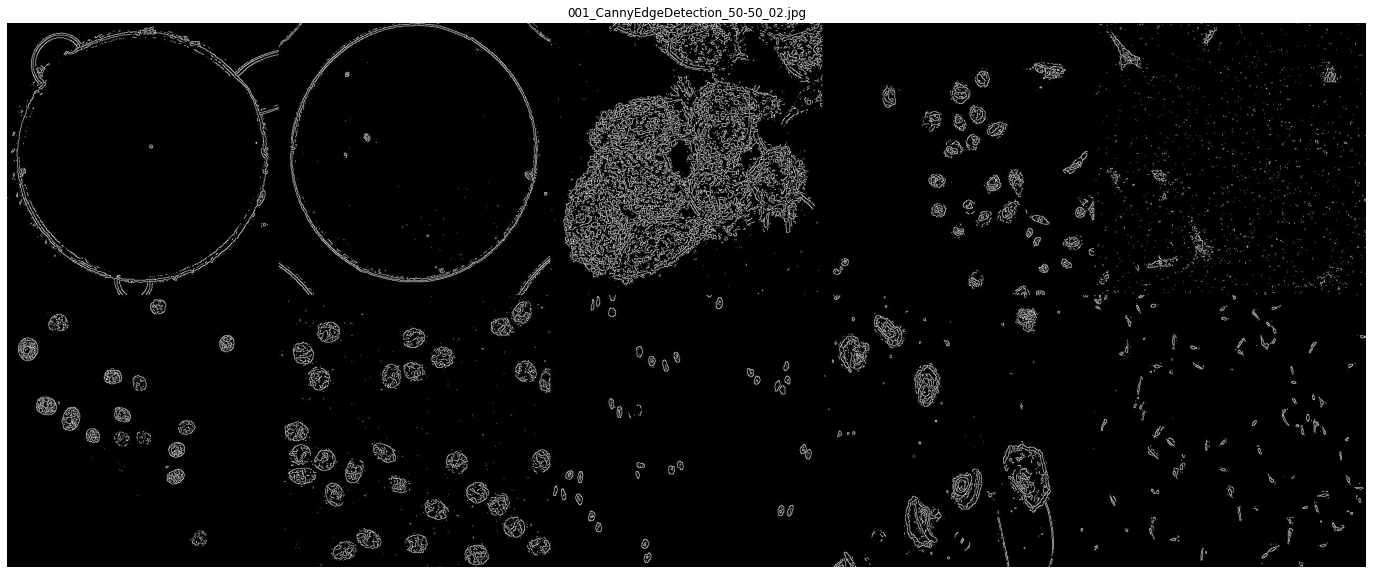

In [29]:
image_collection = []

for i in range(len(location2_pics)):
    image = location2_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 50, 50)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_50-50_02.jpg")

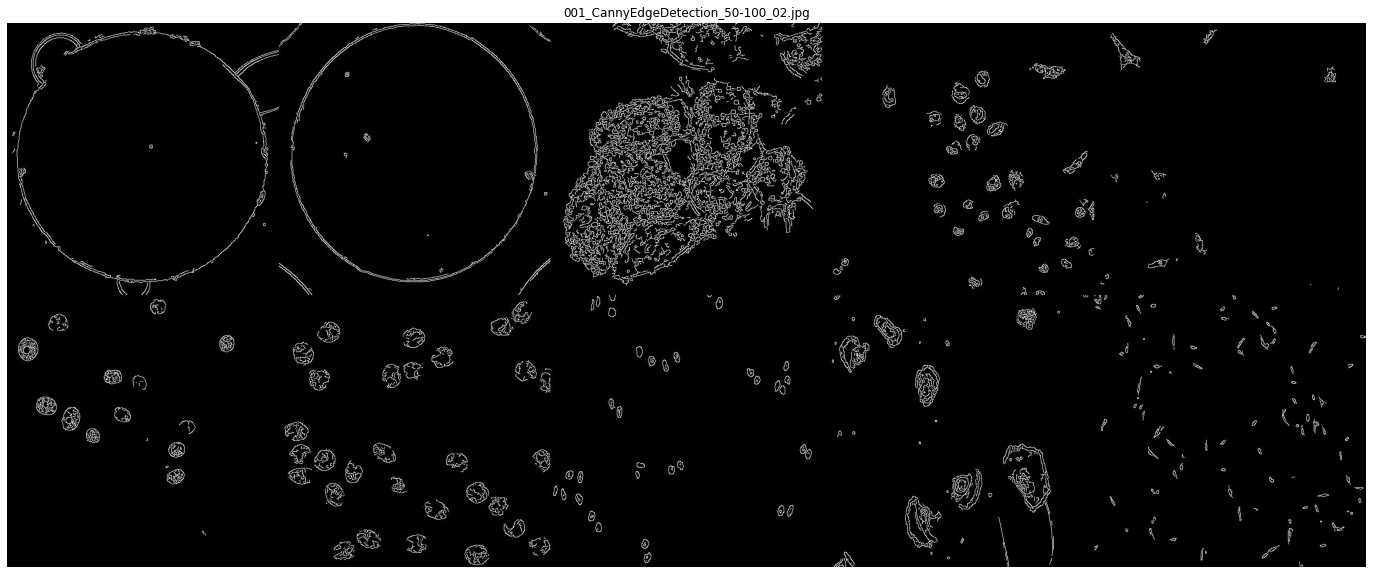

In [30]:
image_collection = []

for i in range(len(location2_pics)):
    image = location2_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 50, 100)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_50-100_02.jpg")

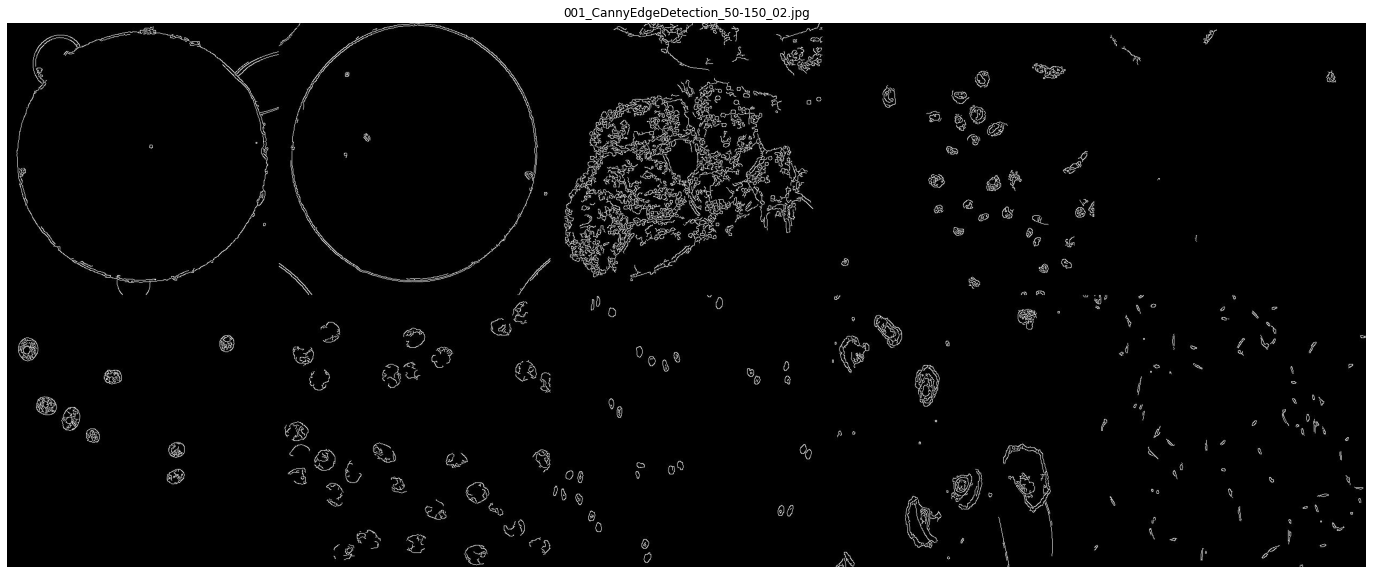

In [31]:
image_collection = []

for i in range(len(location2_pics)):
    image = location2_pics[i]

    canny_edge_img = cannyEdgeDetection(image, 50, 150)

    image_collection.append(canny_edge_img)

saveAndShow(destination_directory, image_collection, "001_CannyEdgeDetection_50-150_02.jpg")

The first data-set is definitely appearing to be more successful than the second!

## Simple Contour

In [36]:
# use the opencv threshold mask of 17 in cv2.threshold()
def simpleContour(image):
    (x, y) = image.shape
    resizedImg = cv2.resize(image,(256,256))
    # Compute the threshold of the grayscale image
    value1 , threshImg = cv2.threshold(resizedImg, np.mean(resizedImg), 255, 17)
    # canny edge detection
    cannyImg = cv2.Canny(threshImg, 0,255)
    # dilate edges detected.
    edges = cv2.dilate(cannyImg, None)

    modifiedImage = cv2.resize(edges, (y, x)) # resize

    return modifiedImage
###

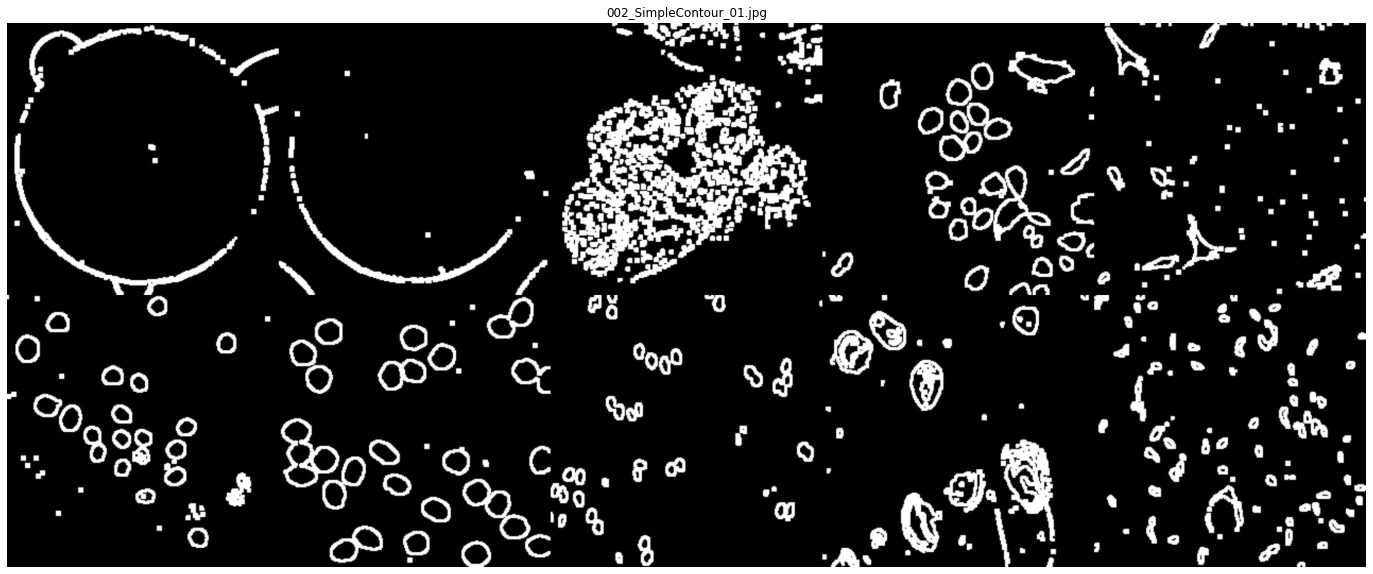

In [37]:
image_collection = []

for i in range(len(location1_pics)):
    image = location1_pics[i]

    simple_contour_img = simpleContour(image)

    image_collection.append(simple_contour_img)

saveAndShow(destination_directory, image_collection, "002_SimpleContour_01.jpg")

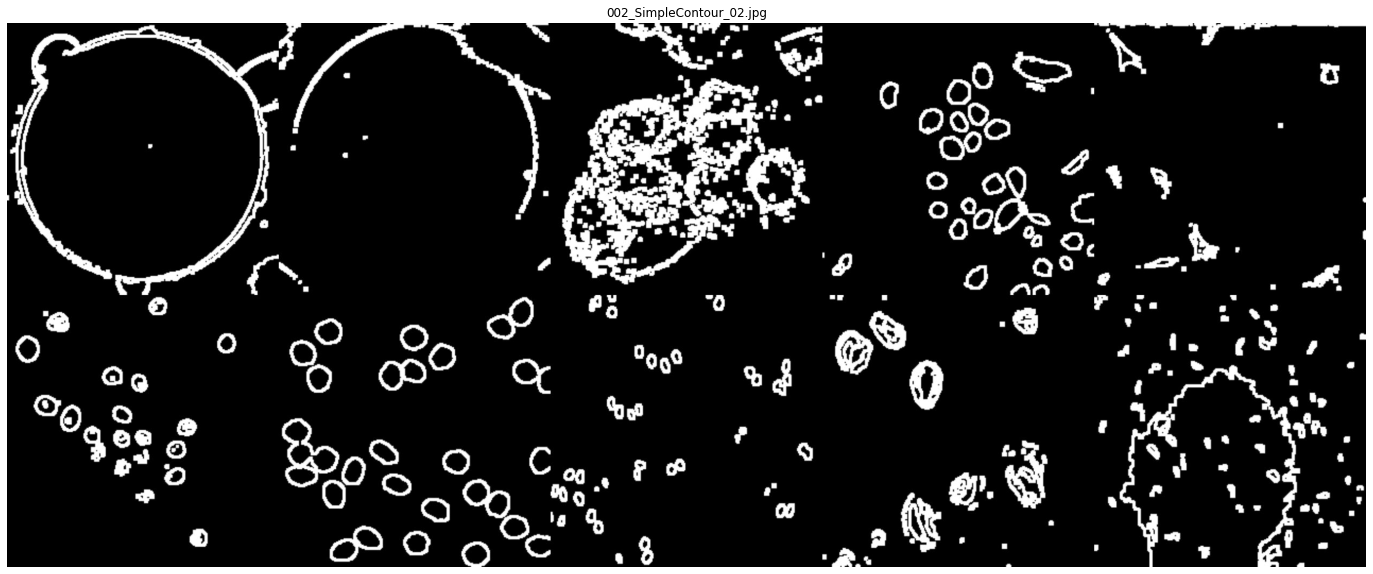

In [38]:
image_collection = []

for i in range(len(location2_pics)):
    image = location2_pics[i]

    simple_contour_img = simpleContour(image)

    image_collection.append(simple_contour_img)

saveAndShow(destination_directory, image_collection, "002_SimpleContour_02.jpg")

Yikes! That is not pleasant! Moving on

## Complete Contour

In [42]:
def completeContour(image):
    (x, y) = image.shape
    resizedImg = cv2.resize(image,(256,256))

    # Compute the threshold of the grayscale image
    value1 , threshImg = cv2.threshold(resizedImg, np.mean(resizedImg), 255, 17)

    # canny edge detection
    cannyImg = cv2.Canny(threshImg, 0,255)

    # dilate edges detected.
    edges = cv2.dilate(cannyImg, None)

    # find all the open/closed regions in the image and store (cnt). (-1 subscript since the function returns a two-element tuple)
    # The - pass them through the sorted function to access the largest contours first.
    cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]

    # Create a zero pixel mask that has equal shape and size to the original image.
    mask = np.zeros((256,256), np.uint8)

    # Draw the detected contours on the created mask.
    masked = cv2.drawContours(mask, [cnt], -1, 255, -1)

    # bitwise AND operation on the original image (img) and the mask
    dst = cv2.bitwise_and(resizedImg, resizedImg, mask=mask)
    
    modifiedImage = cv2.resize(dst, (y, x)) # resize

    return modifiedImage
###

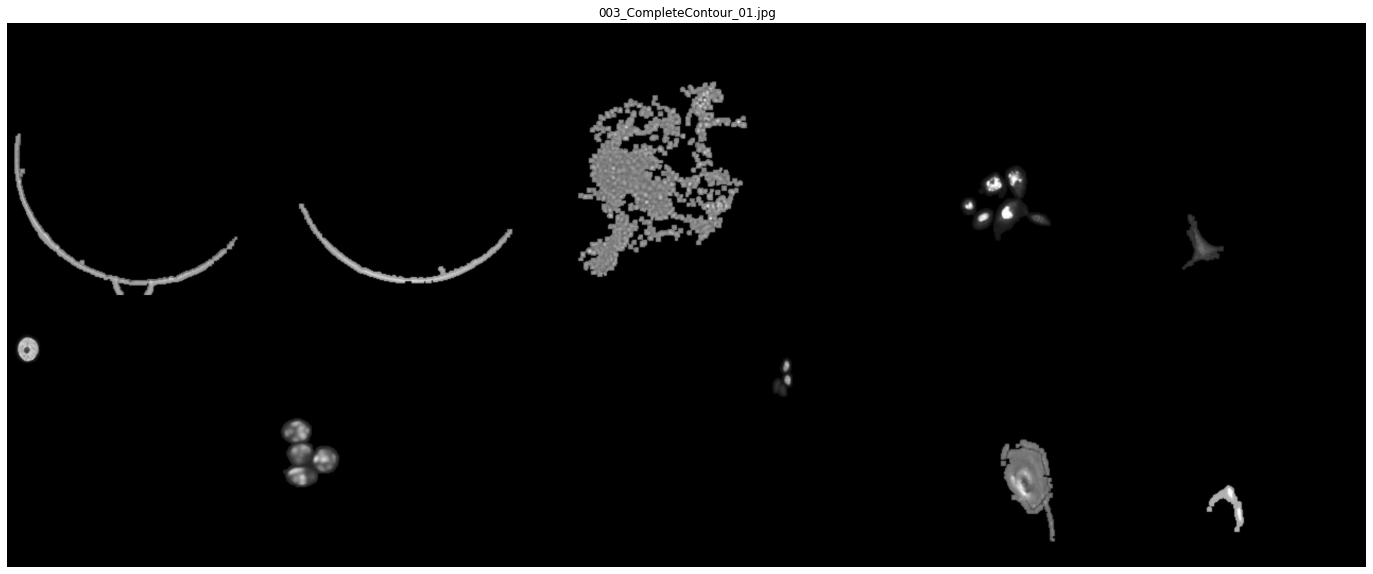

In [45]:
image_collection = []

for i in range(len(location1_pics)):
    image = location1_pics[i]

    complete_contour_img = completeContour(image)

    image_collection.append(complete_contour_img)

saveAndShow(destination_directory, image_collection, "003_CompleteContour_01.jpg")

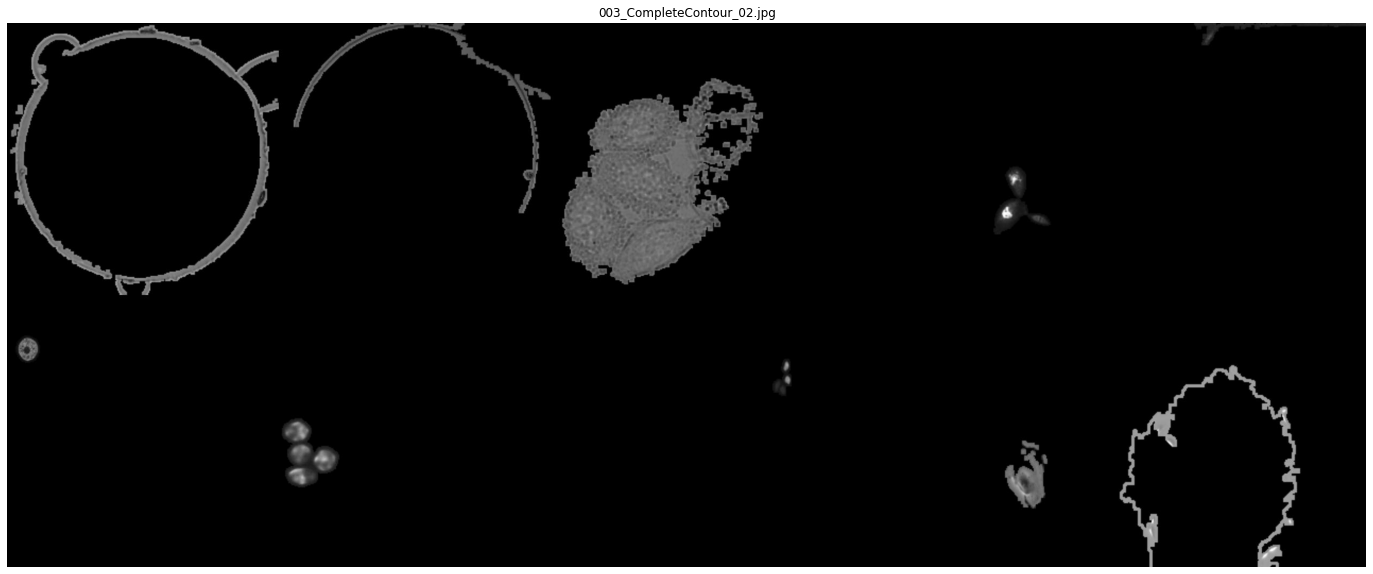

In [47]:
image_collection = []

for i in range(len(location2_pics)):
    image = location2_pics[i]

    complete_contour_img = completeContour(image)

    image_collection.append(complete_contour_img)

saveAndShow(destination_directory, image_collection, "003_CompleteContour_02.jpg")

That is unfortunate, however that technique could prove helpful when we post process the segmentation later!